In [1]:
#step 1: data processing 
#the actual todo is easy if your data is all nice and clean but no data is without inconsistencies
# load the libraries

import pandas as pd  
import numpy as np 


C:\Users\567ra\AppData\Local\Temp\ipykernel_2084\876816563.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

movies = pd.read_csv('movies_metadata.csv')
print(movies.head(1))
#The reason i get this low_memory warning is because guessing dtypes for each column is very memory demanding. Pandas tries to determine 
#what dtype to set by analyzing the data in each column.


#the data is messy
#columns like 'belongs_to_collection' and 'genres' are like dictionary format but are not dictionary
print(type(movies['belongs_to_collection'].iloc[0]))
#this is string
#we need to parse the string 
#i wil use ast module 


   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   

                               homepage   id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story  862  tt0114709                en   

  original_title                                           overview  ...  \
0      Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   

  release_date      revenue runtime                          spoken_languages  \
0   1995-10-30  373554033.0    81.0  [{'iso_639_1': 'en', 'name': 'English'}]   

     status  tagline      title  video vote_average vote_count  
0  Released      NaN  Toy Story  False          7.7     5415.0  

[1 rows x 24 columns]
<class 'str'>


C:\Users\567ra\AppData\Local\Temp\ipykernel_2084\2866055428.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_metadata.csv')


In [3]:
credits = pd.read_csv('credits.csv')

In [4]:
movies.astype({'genres': str})
movies = movies.rename(columns={'imdb_id' : 'imdbId'})

In [ ]:
#clean movies id column

In [5]:
import ast 

In [6]:
def parse(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return []

# Apply the function to the column to convert the strings to lists of dictionaries
movies['belongs_to_collection'] = movies['belongs_to_collection'].apply(parse)

# Display the first few rows to check the parsing
movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdbId,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,[],65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [7]:
credits['crew'] = credits['crew'].apply(parse)
credits['cast'] = credits['cast'].apply(parse)

In [8]:
#using type() to check the new data type
type(movies['belongs_to_collection'].iloc[0])

dict

In [9]:
# Apply the function to the column to convert the strings to list of dictionaries
movies['genres'] = movies['genres'].apply(parse)

# Display the first few rows to check the parsing
movies.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdbId,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [10]:
movies['genres'].iloc[0]

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [11]:
#import matplotlib to plot and visualize data
import matplotlib.pyplot as plt

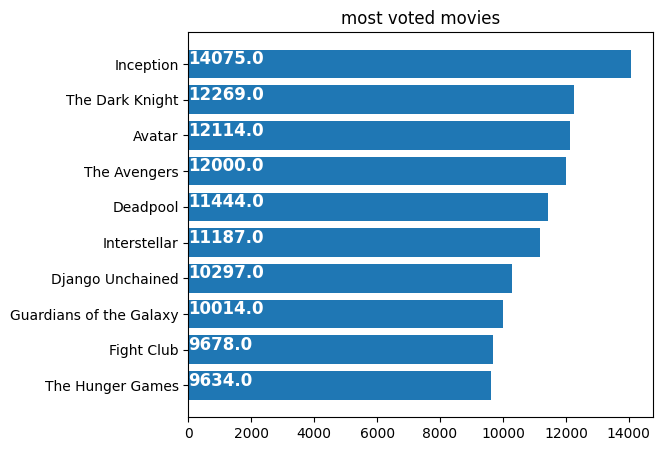

In [12]:
#[[[[[[[[[[[[[[[[[[[[[[[[[[#most voted movies]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]
x = movies.nlargest(10, 'vote_count')  #gives rows containg n largest values in a column 
x= x.sort_values(by = 'vote_count', ascending= True)
fig, ax = plt.subplots(figsize=(6,5))
ax.barh(x['original_title'] , x['vote_count'])


for i, v in enumerate(list((x['vote_count']))): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')

plt.title('most voted movies')
plt.show()


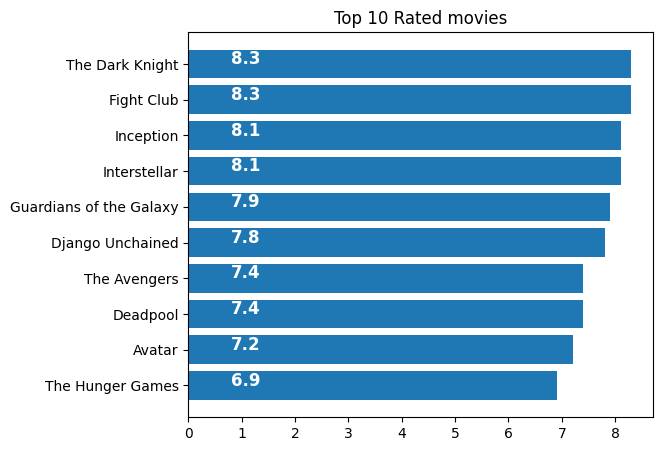

In [13]:
#[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[#highest rated movies among our most voted movies]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]
x= x.sort_values(by = 'vote_average', ascending= True)

fig, ax = plt.subplots(figsize=(6,5))
ax.barh(x['original_title'] , x['vote_average'])


for i, v in enumerate(list((x['vote_average']))): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')

plt.title('Top 10 Rated movies')
plt.show()


In [14]:
#before 
print(movies['genres'].iloc[0])


def extract_names(parsed_list):
    return [item['name'] for item in parsed_list if 'name' in item]

# Apply the function to extract 'name' values 
movies['genres']= movies['genres'].apply(extract_names)

#after 
print(movies['genres'].iloc[0])


[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
['Animation', 'Comedy', 'Family']


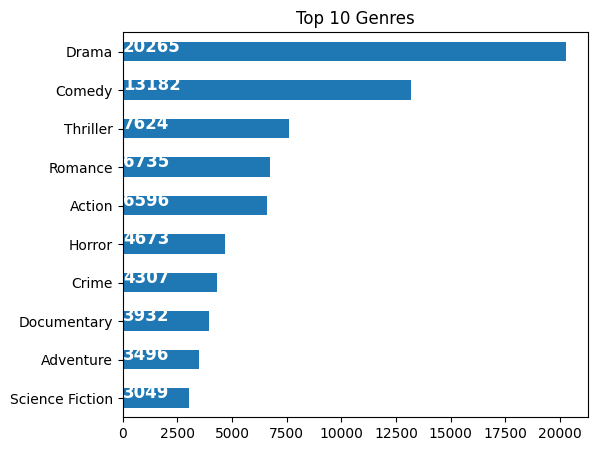

In [15]:
#[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[top 10 Genres]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]

plt.subplots(figsize=(6,5))
list1 = []   #this list will contain all the occurences of a genre from all movies
for i in movies['genres']:
    list1.extend(i)


genrelist = set(list1)   # this will give all the unique genres we have in our dataset this will come of use later
genrelist = list(genrelist)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh()

#put text on bars
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top 10 Genres')
plt.show()

In [16]:
#extract all the names of actors in a movie
def extract_names(parsed_list):
    return [item['name'] for item in parsed_list if 'name' in item]

credits['cast'] = credits['cast'].apply(extract_names)
#-----------------------------------------------------------------------------



#again there are many people here but the most significant one is the director, one one have a favourite Post Production Supervisor but people do have
#a favourite director or atleast know them
#so we will only use director name for our purpose 
#extract director names
def extract_director(parsed_list):
    if parsed_list != []:
        return parsed_list[0]['name']

credits['crew'] = credits['crew'].apply(extract_director)
credits


,cast,crew,id
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,862
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Larry J. Franco,8844
2,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,15602
3,"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,31357
4,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Alan Silvestri,11862
...,...,...,...
45471,"[Leila Hatami, Kourosh Tahami, Elham Korda]",Hamid Nematollah,439050
45472,"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...",Lav Diaz,111109
45473,"[Erika Eleniak, Adam Baldwin, Julie du Page, J...",Mark L. Lester,67758
45474,"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...",Yakov Protazanov,227506


In [17]:
#extract name values 
credits['cast'].iloc[0]
#now there are many actors in a movie but we dont need them all, we only need the main and popular ones like 'Tom Hanks' , 'Tom cruise' etc
#fortunately the order in which the actors are mentioned is according to their significance and their contribution( i'll assume that :)
#so we will only take only the top 


['Tom Hanks',
 'Tim Allen',
 'Don Rickles',
 'Jim Varney',
 'Wallace Shawn',
 'John Ratzenberger',
 'Annie Potts',
 'John Morris',
 'Erik von Detten',
 'Laurie Metcalf',
 'R. Lee Ermey',
 'Sarah Freeman',
 'Penn Jillette']

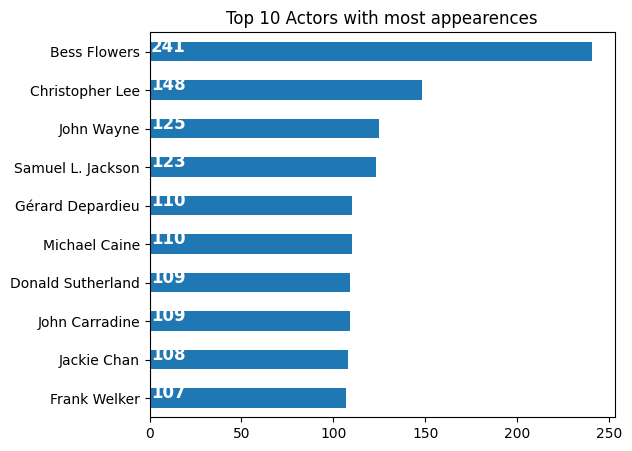

In [18]:
#[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[top 10 Actors]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]] 

plt.subplots(figsize=(6,5))
list2 = []  
for i in credits['cast']:
    list2.extend(i)


actors = set(list2)  
actors = list(actors)
    
ax = pd.Series(list2).value_counts()[:10].sort_values(ascending=True).plot.barh()

#put text on bars
for i, v in enumerate(pd.Series(list2).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top 10 Actors with most appearences')
plt.show()

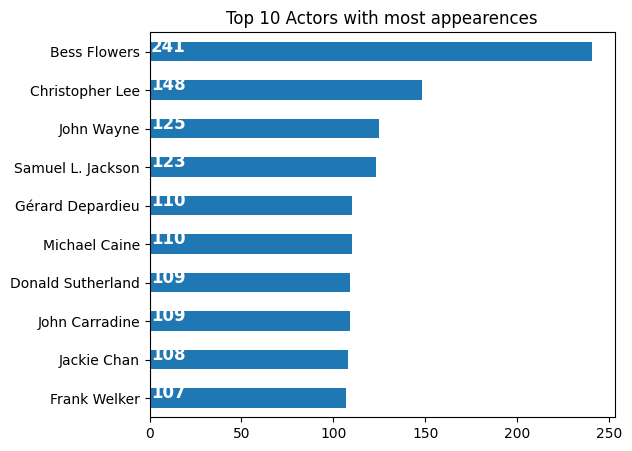

In [19]:
#[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[top 10 Actors]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]] 

plt.subplots(figsize=(6,5))
list2 = []  
for i in credits['cast']:
    list2.extend(i)


actors = set(list2)  
actors = list(actors)
    
ax = pd.Series(list2).value_counts()[:10].sort_values(ascending=True).plot.barh()

#put text on bars
for i, v in enumerate(pd.Series(list2).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top 10 Actors with most appearences')
plt.show()

In [20]:

#i will first use content based filtering
#These filtering methods are based on the description of an item and a profile of the user’s preferred choices. 
#In a content-based recommendation system, keywords are used to describe the items, besides, a user profile is built to state the type of 
#item this user likes.
#In other words, the algorithms try to recommend products that are similar to the ones that we are given. this approach uses already defined and known
#features(for which we have data for ) to compare our options and recommend the one with most similar feature values. in our case of movies recommendation
#features like genres, cast, crew, keywords, taglines, overview can be used to find similar movies 




In [21]:
#[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[MODEL 1 CONTENT BASED USING OVERVIEW COLUMN ]]]]]]]]]]]]]]]]]]]]]]]]

#i need to convert the word vector of each overview. Now i'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

#term frequency , it is the relative frequency of a word in a document and is given as (term instances/total instances).
#Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term)
#The overall importance of each word to the documents in which they appear is equal to TF * IDF


#This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document)
#and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore,
#their significance in computing the final similarity score.


#basically we will compute importance of all words in different movies

#Fortunately, scikit-learn gives a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a few lines.

In [22]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a' (commmon words)
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
movies['overview'] = movies['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(45466, 75827)

In [24]:
# Import linear_kernel 
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
#this can take a while
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [57]:
keywords = pd.read_csv('keywords.csv')

In [58]:
movies.drop(movies.loc[movies['id']])

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
46414                                                  NaN
46415                                                  NaN
46416                                                  NaN
46417                                                  NaN
46418                                                  NaN
Length: 46419, dtype: object

In [25]:
def get_recommendation(s):
    movie_list = movies[movies['original_title'].str.contains(s)]
    if len(movie_list) == 0:
        print('Movie not found')
        return
    else : idx = movie_list.index[0]
    
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    print(movies.iloc[movie_indices]['original_title'])
    

In [26]:
get_recommendation('Dilwale Dulhania Le Jayenge') #romantic movies

36527       Dhund: The Fog
36869             Gangster
36204              Yaadein
36356              Humraaz
30283    I Hate Luv Storys
Name: original_title, dtype: object


In [27]:
get_recommendation('Transformers')

11925                           Transformers
13833    Transformers: Revenge of the Fallen
44842          Transformers: The Last Knight
43870                   The Matrix Revisited
44167                            Kid's Story
Name: original_title, dtype: object


In [28]:
get_recommendation('Generation Kill') #all these are war movies

12381    Operation Homecoming: Writing the Wartime Expe...
11673                                        The Situation
12765                                   Battle For Haditha
11996                                        The War Tapes
14853                             The House on 92nd Street
Name: original_title, dtype: object


In [29]:
get_recommendation('Star Wars')

1154              The Empire Strikes Back
30434       The Star Wars Holiday Special
26555        Star Wars: The Force Awakens
1167                   Return of the Jedi
34153    Maciste alla corte del Gran Khan
Name: original_title, dtype: object


In [30]:
#{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{#MODEL 2 COLLABORATIVE FILTERING}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}

#----------------------------------------------------------------KNN------------------------------------------------------------------------------------
ratings = pd.read_csv('ratings_small.csv')
links   = pd.read_csv('links_small.csv')
#this approach involves making large matrices, with columns as user and rows as movies and values as ratings. when i tried it with ratings.csv
#i was getting RuntimeWarning: overflow encountered in long_scalar. which is due to the dataset being too big for .pivot method. I tried to solve this
#by removing users with less contributions i.e uesrs with few movies rates and movies with only few votes but that too didn't to anything.


#so for now i used ratings_small.csv
#this will limit me to a lot less movies and user data, so the recommendations may not be accurate. 


In [31]:
# processing movies imdb_id column and converting it into intergers
print(movies.shape)

#drop na values
movies.dropna(subset=['imdbId'], inplace= True)
print(movies.shape)



#removing 'tt' from the beginning, from what i can see it seems all the values have 'tt' at the beginning.
x = movies['imdbId']
def v(p):
    return (p[2:])   
new = x.apply(v)
movies['imdbId'] = new

#i then tried typecasting to int but got an value error

(45466, 24)
(45449, 24)


In [60]:
#dropping all rows where imdbId column cannot be converted to int 
def can_be_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

x = movies['imdbId'].apply(can_be_int)
movies = movies[x]

(45446, 24)

In [32]:
movies = movies.astype({'imdbId' : str})

In [33]:
# this worked 
print(list(movies.loc[movies['imdbId'] == ''].index))
print(movies.shape)
movies.drop(list(movies.loc[movies['imdbId'] == ''].index), axis = 0, inplace= True)
print(movies.shape)

[19730, 29503, 35587]
(45449, 24)
(45446, 24)


In [34]:
movies= movies.astype({'imdbId' : int})

In [35]:
#converting links imdbId column to integers  
links = links.astype({'imdbId' : int})
links.head(1)

,movieId,imdbId,tmdbId
0,1,114709,862.0


In [36]:
# making the matrix 
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
#fill all nan values with 0
final_dataset.fillna(0,inplace=True)

# no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
# no_movies_voted = ratings.groupby('userId')['rating'].agg('count')
# final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

final_dataset
#we have 671 users and 9066 movies

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Our final_dataset has dimensions of 9066*671 where most of the values are sparse. which is not too big but its a good practice to use csr_matrix
# while handling sparse data like this one reduce the sparsity using csr_matrix function from the scipy library.
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [38]:
csr_data = csr_matrix(final_dataset.values)

In [39]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [40]:

def idxtitle(idx):  #takes intput a movieid and outputs a movie title corresponding to that id
    a = links.loc[links['movieId'] == idx]['imdbId']           #a is a series 
    b = movies.loc[movies['imdbId'] == list(a)[0]]['original_title']   #b is a series
    return list(b)[0]



def get_recommendation1(s , n = 5):
    # gives a movieid corresponding to a movie title
    movie_list = movies[movies['original_title'].str.contains(s)]
    imdb =  movies.iloc[movie_list.index[0]]['imdbId']
    a = links.loc[links['imdbId'] == imdb]['movieId']
    if len(a) == 0:        
        print('Movie not found')
        return
    movieid = list(a)[0]



    #get index of the movie vector in final_datset matrix
    movie_index = final_dataset.index.get_loc(movieid)

    #get indices of movie vectors most similar to our movie 
    distance ,indices = knn.kneighbors(csr_data[movie_index], n_neighbors = n+1)

    #extract movieid of our similar movies
    x = []
    for i in indices[0]:
        x.append(final_dataset.index[i])
    print(f'Movies similar to {s}:')
    for i in x[1:]:
        print(idxtitle(i))


In [41]:
get_recommendation1('Terminator')   
#there is a lot of room for improvement, since i used the ratings_small dataset, the number of users are just 671, which is just not enough
#this can be the reason why movies like Forrest Gump gets recommended. 

Movies similar to Terminator:
Jurassic Park
The Terminator
Braveheart
Forrest Gump
Speed


In [42]:
get_recommendation1('Rambo')

Movies similar to Rambo:
How High
Monkey Shines
Rambo III
Amos & Andrew
Needful Things


In [43]:
get_recommendation1('The Avengers')

Movies similar to The Avengers:
Police Academy: Mission to Moscow
Police Academy 6: City Under Siege
Legally Blonde 2: Red, White & Blonde
Home Alone 3
Police Academy 4: Citizens on Patrol


In [44]:
get_recommendation1('Star Wars')

Movies similar to Star Wars:
The Empire Strikes Back
Return of the Jedi
Raiders of the Lost Ark
Back to the Future
The Matrix


In [45]:
get_recommendation1('Pulp Fiction')

Movies similar to Pulp Fiction:
The Silence of the Lambs
The Shawshank Redemption
Se7en
Forrest Gump
The Usual Suspects


In [46]:
get_recommendation1('Generation')

Movies similar to Generation:
Gothic
Nowhere
Another Day in Paradise
Prospero's Books
Jubilee


In [47]:
# ----------------------------------------------------------------Matrix Factorization ------------------------------------------------

# Matrix Factorization is simply a mathematical tool for playing around with matrices. The Matrix Factorization techniques are usually more
# effective, because they allow users to discover the latent (hidden)features underlying the interactions between users and items(movies).


import sklearn 
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state = 17)


#predict the matrix of shape 9066*12 and 12*671, using final_dataset as training set, usual gradient descent algorithm is used for get the best values 
#in predicted matrix
matrix = SVD.fit_transform(final_dataset)
matrix.shape
#here the shape is 9066*12, where 9066 is the number of movies in our ratings data. this matrix defines relation between these movies and 
#12 latent hidden features.
#movie vector most similar to our vector gets recommended

(9066, 12)

In [48]:
# The np.corrcoef function in NumPy calculates the Pearson correlation coefficients between pairs of variables. The Pearson correlation coefficient 
# measures the linear relationship between two datasets. Its value ranges from -1 to 1, 
# When two features are positively correlated, it means that they are directly related and that a rise in one would result in an
# increase in the other. A negative correlation is also possible, indicating that the two qualities are inversely related to one
# another, such that an increase in one would cause a decrease in the other.
corr = np.corrcoef(matrix)
corr.shape

(9066, 9066)

In [49]:

def idxtitle(idx):  #takes intput a movieid and outputs a movie title corresponding to that id
    a = links.loc[links['movieId'] == idx]['imdbId']           #a is a series 
    if a.empty:
        return
    else:
        b = movies.loc[movies['imdbId'] == list(a)[0]]['original_title']   #b is a series
        return list(b)[0]



def get_recommendation2(s , n = 5):
    # gives a movieid corresponding to a movie title
    movie_list = movies[movies['original_title'].str.contains(s)]
    if len(movie_list) == 0:
        print('Movie not found')
    imdb =  movies.iloc[movie_list.index[0]]['imdbId']
    a = links.loc[links['imdbId'] == imdb]['movieId']
    if len(a) == 0:        
        print('Movie not found')
        return
    movieid = list(a)[0]



    #get index of the movie vector in final_datset matrix
    movie_index = final_dataset.index.get_loc(movieid)

    k = corr[movie_index]
    

    #only consider values of correlation coefficient for a movie which are between 1 and 0.9 (more related)
    #increase these values to get only top recommendations
    p =list(final_dataset.index[(k<1) & (k>0.9)])


    
    print(f'Movies similar to {s}:')
    for i in p:
        print(idxtitle(i))


In [50]:
get_recommendation2('The Avengers')

Movies similar to The Avengers:
Hav Plenty
The Gods Must Be Crazy II
The Avengers
Clue
Bird on a Wire
Supergirl
Jaws: The Revenge


In [51]:
get_recommendation2('Star Wars')

Movies similar to Star Wars:
Blade Runner
Die Hard
The Empire Strikes Back
Raiders of the Lost Ark
Aliens
Return of the Jedi
Alien
The Terminator
Back to the Future
Indiana Jones and the Last Crusade
Per qualche dollaro in più
Bamboozled


In [52]:
get_recommendation2('Pulp Fiction')

Movies similar to Pulp Fiction:
Se7en
The Usual Suspects
Natural Born Killers
Léon
The Shawshank Redemption
Forrest Gump
Schindler's List
The Silence of the Lambs
